<a href="https://colab.research.google.com/github/rtomek9/project_votingGroup23DS3001/blob/main/VA_data_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [7]:
! git clone https://github.com/DS3001/project_voting


Cloning into 'project_voting'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 70 (delta 5), reused 3 (delta 3), pack-reused 62
Receiving objects: 100% (70/70), 31.37 MiB | 18.87 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn # The machine learning library we will be using in this entire course
from sklearn import tree # Tree function is used for visualizing decision tree
from sklearn.metrics import * # Importing function that can be used to calculate different metrics
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Algorithm
from sklearn.ensemble import RandomForestClassifier # Importing Randomg Forest Algorithm
from sklearn.model_selection import train_test_split # Importing function that can split a dataset into training and testing set
from sklearn.preprocessing import MinMaxScaler # Importing function for scaling the data
from sklearn.ensemble import GradientBoostingClassifier # Importing GB Classifier
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV
import matplotlib.pyplot as plt # Importing the package for plotting
import seaborn as sns # Importing another package for plotting
from category_encoders import * # Importing the package for handling categorical variables
import shap # Import shap package for interpreting the results
from mlxtend.plotting import plot_confusion_matrix # To plot the confusion matrix

In [8]:
df = pd.read_csv('/content/project_voting/data/county_adjacencies.csv')

In [9]:
df.head()

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df2 = pd.read_csv('/content/project_voting/data/voting_VA.csv')

In [11]:
df2.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3736 non-null   int64 
 1   year            3736 non-null   int64 
 2   state           3736 non-null   object
 3   state_po        3736 non-null   object
 4   county_name     3736 non-null   object
 5   county_fips     3736 non-null   int64 
 6   office          3736 non-null   object
 7   candidate       3736 non-null   object
 8   party           3736 non-null   object
 9   candidatevotes  3736 non-null   int64 
 10  totalvotes      3736 non-null   int64 
 11  version         3736 non-null   int64 
 12  mode            3736 non-null   object
dtypes: int64(6), object(7)
memory usage: 379.6+ KB


In [13]:
df2.dropna()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,71966,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,24,12113,20220315,ELECTION DAY
3732,71967,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,OTHER,OTHER,0,12113,20220315,PROVISIONAL
3733,71968,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2825,12113,20220315,ABSENTEE
3734,71969,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,2370,12113,20220315,ELECTION DAY


In [14]:
df2['candidate'].unique()

array(['AL GORE', 'GEORGE W. BUSH', 'RALPH NADER', 'OTHER', 'JOHN KERRY',
       'BARACK OBAMA', 'JOHN MCCAIN', 'MITT ROMNEY', 'HILLARY CLINTON',
       'DONALD TRUMP', 'JOSEPH R BIDEN JR', 'JO JORGENSEN',
       'DONALD J TRUMP'], dtype=object)

In [15]:
df2['year'].unique()

array([2000, 2004, 2008, 2012, 2016, 2020])

In [16]:
df2['county_name'].unique()

array(['ACCOMACK', 'ALBEMARLE', 'ALLEGHANY', 'AMELIA', 'AMHERST',
       'APPOMATTOX', 'ARLINGTON', 'AUGUSTA', 'BATH', 'BEDFORD', 'BLAND',
       'BOTETOURT', 'BRUNSWICK', 'BUCHANAN', 'BUCKINGHAM', 'CAMPBELL',
       'CAROLINE', 'CARROLL', 'CHARLES CITY', 'CHARLOTTE', 'CHESTERFIELD',
       'CLARKE', 'CRAIG', 'CULPEPER', 'CUMBERLAND', 'DICKENSON',
       'DINWIDDIE', 'ESSEX', 'FAIRFAX', 'FAUQUIER', 'FLOYD', 'FLUVANNA',
       'FRANKLIN', 'FREDERICK', 'GILES', 'GLOUCESTER', 'GOOCHLAND',
       'GRAYSON', 'GREENE', 'GREENSVILLE', 'HALIFAX', 'HANOVER',
       'HENRICO', 'HENRY', 'HIGHLAND', 'ISLE OF WIGHT', 'JAMES CITY',
       'KING AND QUEEN', 'KING GEORGE', 'KING WILLIAM', 'LANCASTER',
       'LEE', 'LOUDOUN', 'LOUISA', 'LUNENBURG', 'MADISON', 'MATHEWS',
       'MECKLENBURG', 'MIDDLESEX', 'MONTGOMERY', 'NELSON', 'NEW KENT',
       'NORTHAMPTON', 'NORTHUMBERLAND', 'NOTTOWAY', 'ORANGE', 'PAGE',
       'PATRICK', 'PITTSYLVANIA', 'POWHATAN', 'PRINCE EDWARD',
       'PRINCE GEORGE', 'PRINCE

In [17]:
df2['party'].unique()

array(['DEMOCRAT', 'REPUBLICAN', 'GREEN', 'OTHER', 'LIBERTARIAN'],
      dtype=object)

In [18]:
df2['mode'].unique()

array(['TOTAL', 'ABSENTEE', 'ELECTION DAY', 'PROVISIONAL'], dtype=object)

In [19]:
df2['office'].unique()

array(['US PRESIDENT'], dtype=object)

In [20]:
#df2.groupby('candidate', as_index = False).totalvotes#.apply(lambda x: (x.mean()))
candidate_group = df2.groupby('candidate')['candidatevotes'].sum()
candidate_group.head(20)

candidate
AL GORE              1216422
BARACK OBAMA         3931352
DONALD J TRUMP       1962430
DONALD TRUMP         1769443
GEORGE W. BUSH       3153836
HILLARY CLINTON      1981473
JO JORGENSEN           64761
JOHN KERRY           1454742
JOHN MCCAIN          1725005
JOSEPH R BIDEN JR    2413568
MITT ROMNEY          1822522
OTHER                 406335
RALPH NADER            59373
Name: candidatevotes, dtype: int64

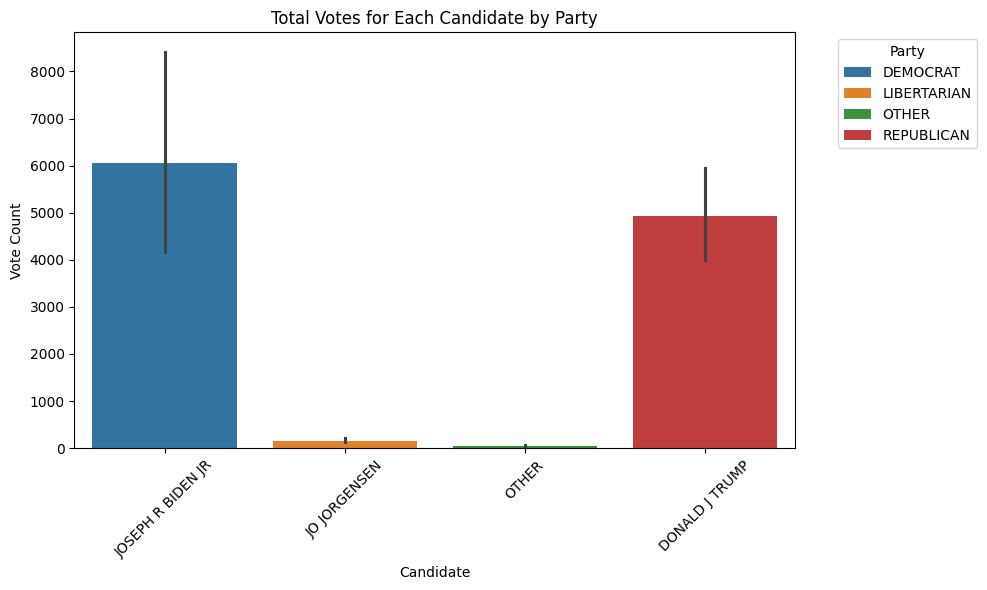

In [21]:
from_2020 = df2.query("year ==2020")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2020, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

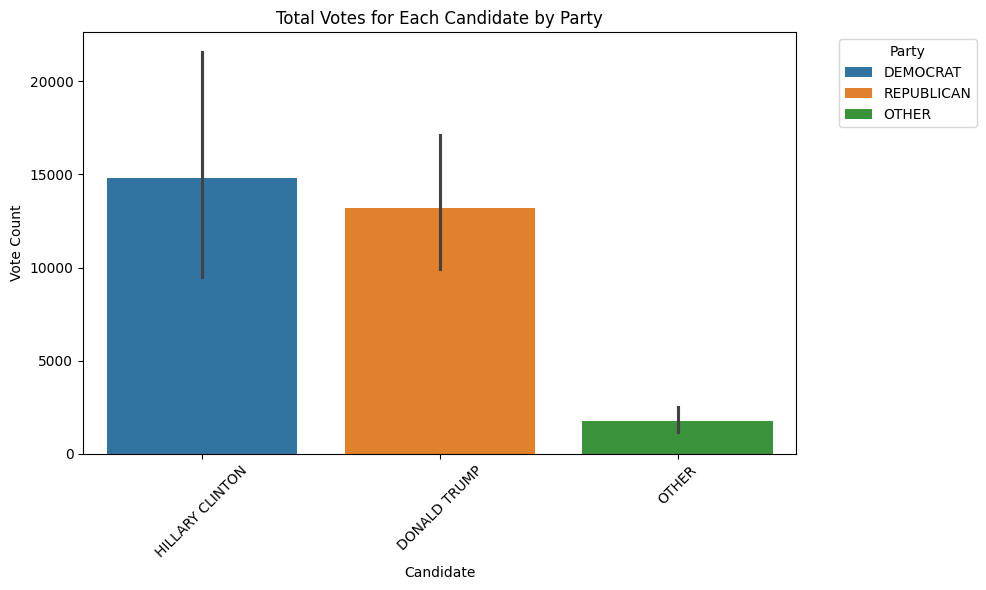

In [22]:
from_2016 = df2.query("year ==2016")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2016, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

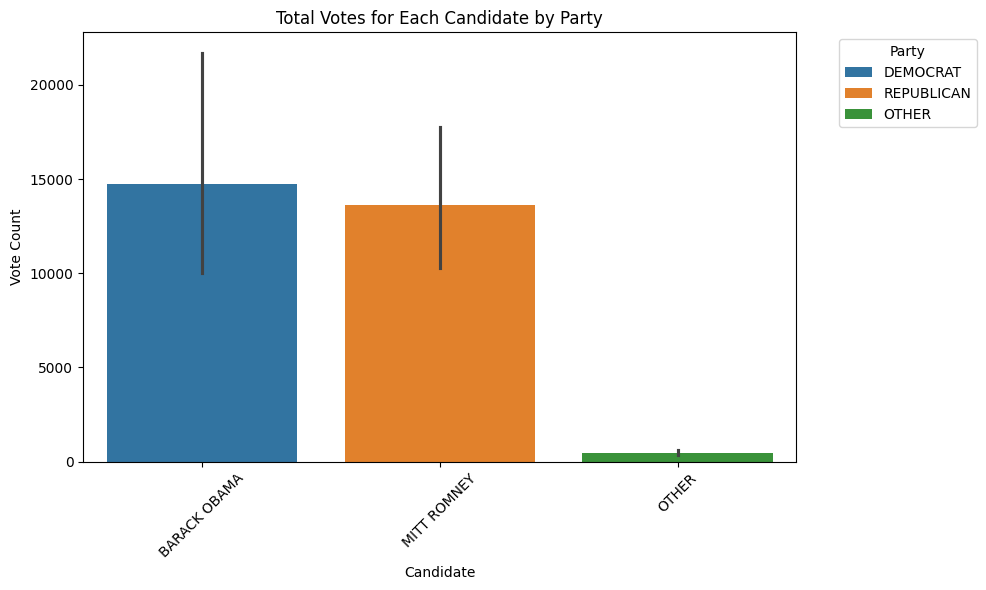

In [23]:
from_2012 = df2.query("year ==2012")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2012, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

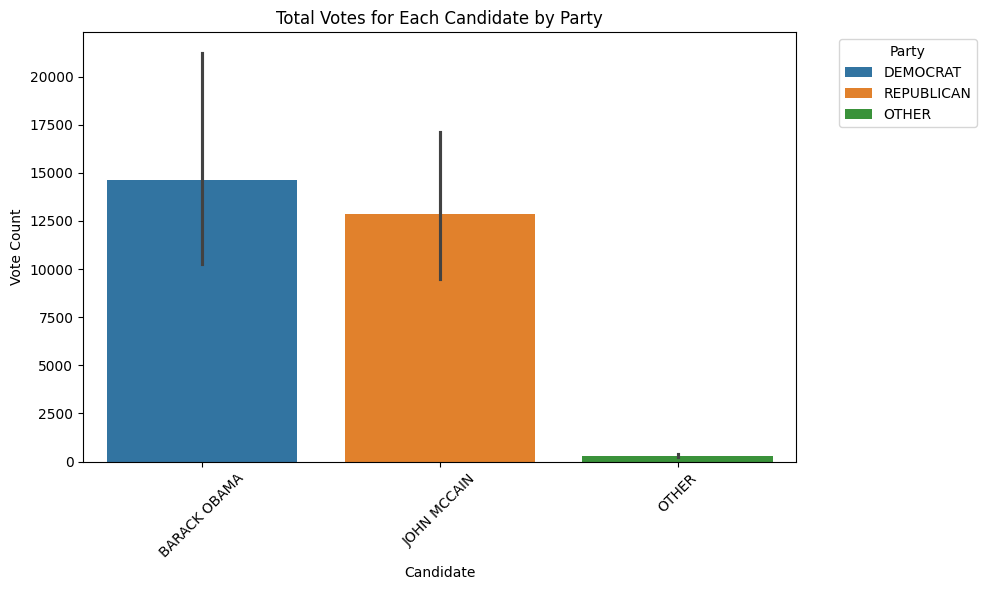

In [24]:
from_2008 = df2.query("year ==2008")
plt.figure(figsize=(10, 6))
sns.barplot(data=from_2008, x='candidate', y = 'candidatevotes' ,hue='party')
plt.xlabel('Candidate')
plt.ylabel('Vote Count')
plt.title('Total Votes for Each Candidate by Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#going to run an xgboost model to come up with targets for 'democrat' or 'republican'
#first, need to join two datasets on FIPS code so that voting data is aligned with income and poverty etc data

In [ ]:
dfc = pd.read_csv('/content/project_voting/data/county_data/most_recent_countyincome_withFIPS.csv', encoding='latin-1')
dfc.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/project_voting/data/county_data/most_recent_countyincome_withFIPS.csv'

In [ ]:
dfc2 = dfc.query('STUSAB=="VA"')
dfc2.head()

In [ ]:
dfc2['county_fips'] = dfc2['FIPS CODE']

In [ ]:
dfc2.head()

In [94]:
df2.head(10)

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
5,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL
6,11167,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,RALPH NADER,GREEN,2043,36846,20220315,TOTAL
7,11168,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,OTHER,OTHER,257,36846,20220315,TOTAL
8,11169,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,AL GORE,DEMOCRAT,2214,5123,20220315,TOTAL
9,11170,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL


In [ ]:

merged_data = pd.merge(df2, dfc2, on='county_fips')
merged_data.head()

In [ ]:
column_list = list(merged_data.columns)
print(column_list)

In [ ]:
drop_columns = ['candidate', 'candidatevotes','year','county_fips', 'Unnamed: 0']
merged_data = merged_data.drop(drop_columns, axis=1)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


encoder = BaseNEncoder(cols=['GISJOIN', # Categorical variable to be encoded
                             'YEAR', # Categorical variable to be encoded
                             'STUSAB', # Categorical variable to be encoded
                             'STATE', # Categorical variable to be encoded
                             'COUNTY', # Categorical variable to be encoded
                             'GEOID',
                             'NAME', 'BTTRA','mode','state','state_po','county_name','office','party'
                             # Categorical variable to be encoded
                            ],
                        base = 3 # Increasing this value will create fewer variables
                      ).fit(merged_data)

df_encod = encoder.transform(merged_data)


In [ ]:
df_encod.head()

In [ ]:
X = df_encod.drop(columns = ['party_0','party_1','mode_1','mode_0', 'totalvotes','state_0'])
y = df_encod.party_1

In [ ]:
trainData, testData, trainLabels, testLabels = train_test_split(X,
                                                                y,
                                                                train_size = .8,
                                                                random_state = 1
                                                               )

In [ ]:
from xgboost import XGBClassifier

parameters = {'objective': ['multi:softmax'],
              'num_class': [4],  # Specify the number of classes in your target variable
              'eval_metric': ['merror'],   # Use 'merror' for multiclass classification
              'max_depth': [1, 2, 3],
              'n_estimators': [10, 20, 30],
              'learning_rate': [0.3, 0.6, 0.9]}

xg_grid = GridSearchCV(XGBClassifier(random_state=1), scoring = 'roc_auc',
                       param_grid = parameters)

xg_grid.fit(trainData, trainLabels)

In [ ]:
predicted_labels = xg_grid.best_estimator_.predict(testData)
predicted_scores = xg_grid.best_estimator_.predict_proba(testData)

In [ ]:
feature_list = X.columns

def plot_feature_importance(importance, names, model_type, top_n=15):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # Select top n features
    fi_df = fi_df[:top_n]

    # Define size of bar plot
    plt.figure(figsize=(10, 8))
    # Plot Seaborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    # Add chart labels
    plt.title('Feature Importance Plot for ' + model_type)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

importance = xg_grid.best_estimator_.feature_importances_
names = feature_list
model_type = "XGBoost Classifier"

plot_feature_importance(importance, names, model_type)

In [ ]:
# AM8FE038 = Female: 75 years and over with a disability
# AM63E033 = Income in the past 12 months at or above poverty level: Male: Under 5 years
# AM63E051 = Income in the past 12 months at or above poverty level: Female: 15 years
# FIPS CODE = code for county (state code & county code) FORGOT TO REMOVE WOOPS
# AM70E007 = Income in the past 12 months below poverty level: 60 to 74 years



In [ ]:
# jillian code

In [25]:
df.head()

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [95]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   year  candidatevotes
0   0.0        0.014338
1   0.0        0.017886
2   0.0        0.000619
3   0.0        0.000735
4   0.0        0.045772
              year  candidatevotes
count  3736.000000     3736.000000
mean      0.641328        0.016552
std       0.379452        0.051959
min       0.000000        0.000000
25%       0.200000        0.000166
50%       0.800000        0.002531
75%       1.000000        0.012807
max       1.000000        1.000000


In [96]:
# for just virginia:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Select data:
y = df2['party'] # Target variable
X = df2.loc[:,['year','candidatevotes']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

In [97]:
## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

In [98]:
## Solve for k that maximizes accuracy:
k_bar = 100 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[31]


In [100]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

print(y_hat)

['REPUBLICAN' 'REPUBLICAN' 'OTHER' ... 'OTHER' 'DEMOCRAT' 'OTHER']


In [109]:
repub = 0
democrat = 0
other = 0
green = 0
libertarian = 0

for each in y_hat:
  if each == 'REPUBLICAN':
    repub = repub + 1
  elif each == 'DEMOCRAT':
    democrat = democrat + 1
  elif each == 'OTHER':
    other = other + 1
  elif each == 'GREEN':
    green = green + 1
  elif each == 'LIBERTARIAN':
    libertarian = libertarian + 1

print('Republican Predictions: ', repub)
print('Democrat Predictions: ', democrat)
print('Other Party Predictions: ', other)
print('Green Party Predictions: ', green)
print('Libertarian Predictions: ', libertarian)


Republican Predictions:  544
Democrat Predictions:  394
Other Party Predictions:  660
Green Party Predictions:  44
Libertarian Predictions:  226


So based on this model, other party is predicted to win

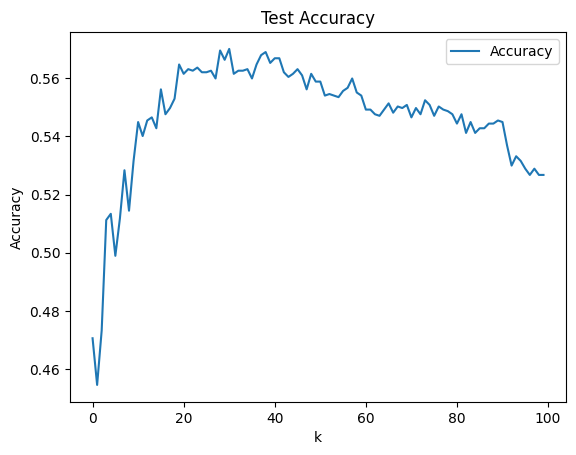

In [101]:
## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [34]:
## Confusion matrix:
pd.crosstab(y_test,y_hat)

col_0,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN
party,,,,,
DEMOCRAT,223,0,46,44,237
GREEN,7,25,0,43,1
LIBERTARIAN,11,0,89,87,2
OTHER,16,19,62,437,13
REPUBLICAN,137,0,29,49,291


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'X_train' and 'y_train' are your training features and labels respectively
# Assuming 'X_new' is your new data for which you want to make predictions

# Initialize the KNN classifier with the desired parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Example: K=5

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the new data
y_pred_new = knn_classifier.predict(df2)

# Print the predicted labels for the new data
print("Predicted Labels for New Data:", y_pred_new)

In [ ]:
# Random forest

In [36]:
df2.head(3)

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL


In [54]:
party_mapping = {'REPUBLICAN': 0, 'DEMOCRAT': 1, 'OTHER': 2, 'GREEN': 3, 'LIBERTARIAN': 4}
df2['party'] = df2['party'].replace(party_mapping)

In [ ]:
# 0 = republican
# 1 = democrat
# 2 = other
# 3 = green party
# 4 = libertarian

In [55]:
df2.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,1,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,0,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,3,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,2,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,1,16255,36846,20220315,TOTAL


0.9279727105158161


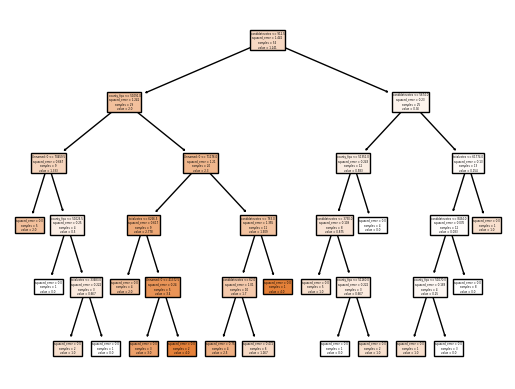

In [56]:
from sklearn.model_selection import train_test_split

def quick_tree(df,depth=5):
    # Resample and Process data:
    df_t = df2.sample(n=df.shape[0],replace=True)
    y = df_t['party']
    X = df_t.drop(['party', "state", "state_po", 'county_name', 'office', 'candidate', 'mode'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=depth) # Create a classifier object
    cart = cart.fit(X_test, y_test) # Fit the classifier
    # Visualize results:
    tree.plot_tree(cart,feature_names=X_train.columns.to_list(),filled=True)
    # Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_train.mean())**2 )
    Rsq = 1 - SSE/TSS
    print(Rsq)

quick_tree(df)

0.8827522529531041


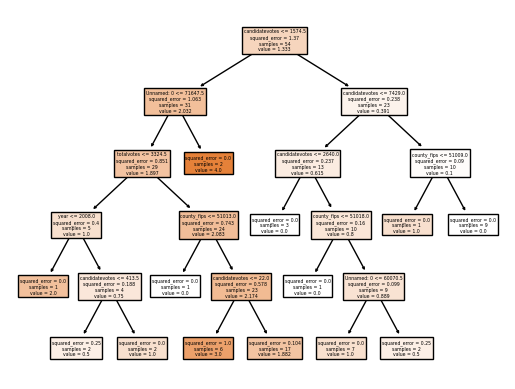

In [57]:
quick_tree(df)

In [ ]:
# ensembles

In [77]:
# Split data into training rows and testing rows:
N = df2.shape[0]
df2 = df2.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df_train = df2[0:train_size]
N_train = df_train.shape[0]
df_test = df2[train_size:]
N_test = df_test.shape[0]

# Bootstrap:
T = 1000
m_depth = 5
Rsq = np.zeros(T) # preallocate the rsq measure
y_test_hat = np.zeros([T,N_test]) # preallocate predictions on test set
df_train.head()

# Split data into train/test:
X_train = df_train.drop(['party', "state", "state_po", 'county_name', 'office', 'candidate', 'mode'], axis=1)
y_train = df_train['party']
X_test = df_test.drop(['party', "state", "state_po", 'county_name', 'office', 'candidate', 'mode'], axis=1)
y_test = df_test['party']

# Bootstrapping:
for s in range(T):
    # Generate a bootstrap sample:
    df_s = df_train.sample(frac=1, replace=True)
    X_s = df_s.drop(['party', "state", "state_po", 'county_name', 'office', 'candidate', 'mode'], axis=1)
    y_s = df_s['party']
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=m_depth) # Create a classifier object
    cart = cart.fit(X_s, y_s) # Fit the classifier
    # Compute Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_s.mean())**2 )
    Rsq[s] = 1 - SSE/TSS
    # Make and Save Predictions:
    y_test_hat[s,:] = y_hat

# Ensemble predictor:
y_hat_ensemble = y_test_hat.mean(axis=0) # Average the columns to get the ensemble prediction
SSE = np.sum( (y_test-y_hat_ensemble)**2 )
TSS = np.sum( (y_test-y_train.mean())**2 )
Rsq_ensemble = 1 - SSE/TSS

print(Rsq_ensemble)

0.5472843729310009


0.5267303936155525


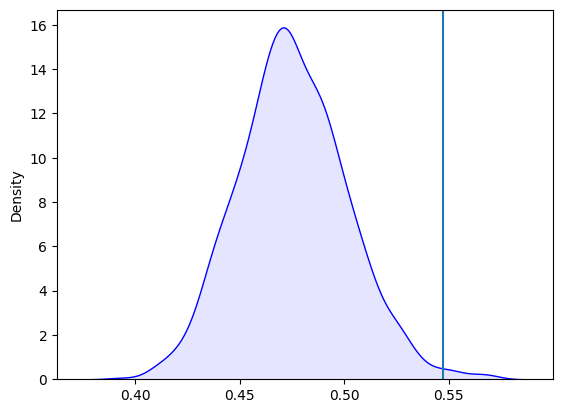

In [78]:
ax = sns.kdeplot(x = Rsq, fill = True, color = "blue", alpha = 0.1)
ax.axvline(x = Rsq_ensemble)

print(np.quantile(Rsq,.97))

In [79]:
y_train.head()

2887    0
2985    1
1429    2
2726    2
2124    0
Name: party, dtype: int64

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

<Axes: xlabel='party'>

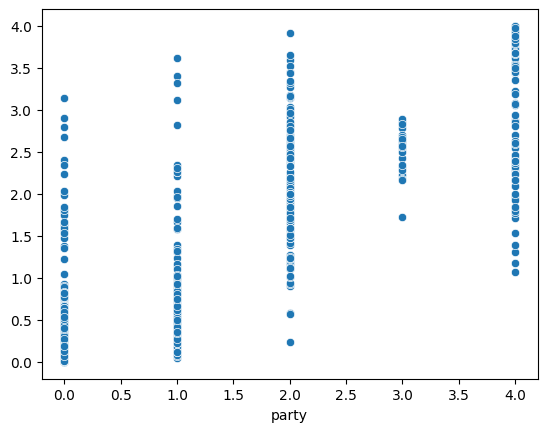

In [81]:
# Scatterplot of predicted v. actual:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

<Axes: xlabel='party', ylabel='Density'>

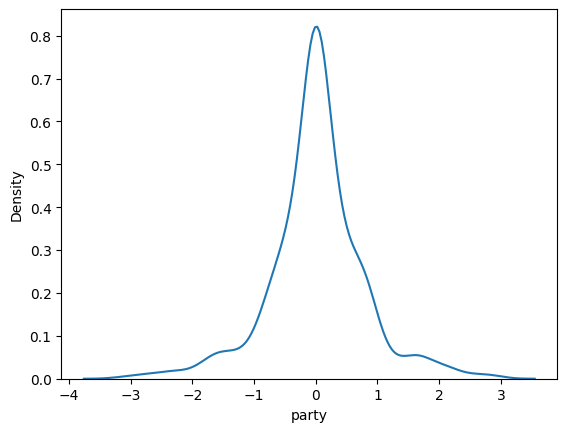

In [82]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

In [83]:
rf.score(X_test,y_test) # Rsq measure

0.6153350693332114

In [84]:
testing_data = df2.drop(['party', "state", "state_po", 'county_name', 'office', 'candidate', 'mode'], axis=1)


new_data_predictions = rf.predict(testing_data)

# Assuming 'new_data' is a DataFrame containing the features for which you want to make predictions

# Display the predictions
print(new_data_predictions)

[0.86 0.79 2.   ... 0.82 0.75 0.53]


In [86]:
df2['party'].value_counts()

party
0    1068
1    1068
2    1068
4     398
3     134
Name: count, dtype: int64

In [87]:
# Calculate the average of all the predicted values
average_prediction = np.mean(new_data_predictions)

# Print the average prediction
print("Average Prediction:", average_prediction)

Average Prediction: 1.3879175588865096


In [88]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X_train' and 'y_train' are your training features and labels respectively
# Assuming 'X_test' is your testing features

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Print the predicted party labels
print("Predicted Party Labels:", y_pred)




Predicted Party Labels: [2 2 4 1 0 2 2 0 2 2 4 0 2 2 3 2 2 2 4 0 0 1 0 0 2 4 2 1 2 0 2 2 1 1 2 0 0
 4 4 0 0 0 2 0 2 0 4 2 1 3 2 3 4 2 3 2 0 4 1 0 0 2 2 1 4 4 2 1 1 2 0 0 0 0
 0 0 4 2 1 1 0 3 1 1 1 4 2 2 1 1 0 2 2 1 2 2 0 2 1 4 2 2 0 3 1 0 3 0 0 4 1
 0 3 2 1 1 2 4 4 2 2 4 0 2 2 3 2 1 2 0 0 4 4 4 1 1 1 1 2 2 2 0 0 2 2 3 3 1
 1 4 2 0 3 0 2 4 0 2 3 0 1 4 2 4 0 1 1 0 0 2 0 0 2 0 0 2 2 0 1 2 2 0 3 0 2
 2 0 2 0 0 1 1 2 3 1 4 4 0 0 2 0 2 1 0 2 0 2 0 2 0 1 2 0 0 2 2 2 2 1 1 1 0
 1 2 3 1 3 2 1 0 0 4 1 0 1 1 0 0 0 2 4 2 1 2 4 0 0 1 3 2 1 1 1 0 0 4 0 2 3
 2 4 0 1 0 0 0 0 1 0 0 4 0 1 2 4 2 2 4 1 2 2 3 4 2 0 4 2 1 3 2 2 2 2 4 2 2
 2 1 2 0 4 2 2 0 0 0 2 0 0 2 2 1 4 1 1 1 0 2 2 2 0 0 3 0 1 0 2 2 2 1 2 0 0
 1 1 0 2 1 2 0 2 2 2 1 2 3 1 0 1 1 0 4 2 1 2 1 1 1 2 1 2 4 1 0 1 1 2 2 2 0
 0 4 0 0 4 2 0 0 0 2 1 2 2 1 0 3 0 2 0 1 0 4 0 2 0 2 0 4 1 0 0 2 2 0 1 0 2
 0 0 2 2 0 1 0 1 0 1 4 2 1 0 2 0 0 0 4 2 4 2 1 2 1 0 0 4 0 1 1 1 2 0 2 0 1
 2 2 2 1 1 2 1 2 2 1 1 0 0 2 0 1 2 2 2 2 2 3 2 2 4 0 4 2 0 2 0 0 4 0 1 0 4
 

In [92]:
# Get unique elements and their counts
from statistics import mode

predicted_party_with_mode = mode(y_pred)

print("Predicted Party: ", predicted_party_with_mode)

Predicted Party:  2


In [72]:
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5588235294117647
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.50       212
           1       0.48      0.46      0.47       211
           2       0.67      0.76      0.71       215
           3       0.38      0.34      0.36        29
           4       0.61      0.56      0.58        81

    accuracy                           0.56       748
   macro avg       0.53      0.52      0.52       748
weighted avg       0.55      0.56      0.55       748



In [74]:
new_data_predictions = rf_classifier.predict(testing_data)

# Display the predictions
print("Predictions for new data:", new_data_predictions)

Predictions for new data: [0 0 1 ... 0 0 1]


In [76]:
from collections import Counter

# Assuming 'new_data_predictions' contains the predicted values
# Count the occurrences of each predicted value
predictions_counter = Counter(new_data_predictions)

# Find the most common predicted value
most_common_value = predictions_counter.most_common(1)[0][0]

# Print the most common predicted value
print("Most common predicted value:", most_common_value)

Most common predicted value: 2


So basically when I used ensembles for a regression model it predicted 1.5 but when i used party as categorical and did a classification version model i got that it preidicted a "other" party would win...